In [ ]:
#https://web.facebook.com/groups/651105805682935/
#https://github.com/AarohiSingla/Faster-R-CNN/blob/main/data_prep.ipynb
#https://github.com/AarohiSingla/Faster-R-CNN-on-Custom-Dataset/blob/main/custom_data_prepration.ipynb
#https://github.com/AarohiSingla/Faster-R-CNN-on-Custom-Dataset/blob/main/training_fasterrcnn.ipynb

In [ ]:
import cv2
import csv
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/Faster_RCNN')

Mounted at /Faster_RCNN


In [ ]:
annotations_bbox =pd.read_csv('/Faster_RCNN/MyDrive/faster_RCNN/train-annotations-bbox.csv')



In [ ]:
print(annotations_bbox.columns)
print(annotations_bbox.info())
annotations_bbox

#for dtype in annotations_bbox.dtypes.iteritems():
#    print(dtype)

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610229 entries, 0 to 14610228
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ImageID      object 
 1   Source       object 
 2   LabelName    object 
 3   Confidence   int64  
 4   XMin         float64
 5   XMax         float64
 6   YMin         float64
 7   YMax         float64
 8   IsOccluded   int64  
 9   IsTruncated  int64  
 10  IsGroupOf    int64  
 11  IsDepiction  int64  
 12  IsInside     int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 1.4+ GB
None


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14610224,fffffdaec951185d,xclick,/m/0dzct,1,0.445625,0.672500,0.154784,0.200750,1,0,1,0,0
14610225,fffffdaec951185d,xclick,/m/0dzct,1,0.695625,0.786250,0.118199,0.297373,0,0,0,0,0
14610226,fffffdaec951185d,xclick,/m/0dzct,1,0.788750,0.835000,0.198874,0.272045,1,0,0,0,0
14610227,fffffdaec951185d,xclick,/m/0dzct,1,0.796875,0.951875,0.156660,0.205441,1,0,1,0,0


In [ ]:
############ print images_boxable_files head
images_boxable=pd.read_csv('/Faster_RCNN/MyDrive/faster_RCNN/train-images-boxable-with-rotation.csv')
images_boxable.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0
3,86638230febe21c4,train,https://farm5.staticflickr.com/5128/5301868579...,https://www.flickr.com/photos/ajcreencia/53018...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ajcreencia/,Alex,Abbey and Kenny,949267,onB+rCZnGQg5PRX7xOs18Q==,https://c4.staticflickr.com/6/5128/5301868579_...,NaN
4,249086e72671397d,train,https://c6.staticflickr.com/4/3930/15342460029...,https://www.flickr.com/photos/codnewsroom/1534...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/codnewsroom/,COD Newsroom,Suburban Law Enforcement Academy 20th Annivers...,6541758,MjpaAVbMAWbCusSaxI1D7w==,https://c1.staticflickr.com/4/3930/15342460029...,0.0


In [ ]:
img_id='86638230febe21c4'
print(images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values)
########################  or  ############################
#print(images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0])
######## because er endex er max value =0 

['https://farm5.staticflickr.com/5128/5301868579_f042b35323_o.jpg']


In [ ]:
######### print the class_descriptions_file
########## header=None must dite hobe ta na hole must error  pabooooooo
class_descriptions =pd.read_csv('/Faster_RCNN/MyDrive/faster_RCNN/class-descriptions-boxable.csv',header=None)
class_descriptions.shape
#print('first column : ',class_descriptions[0])
class_descriptions .head()

,0,1
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [ ]:
images_boxable.columns

Index(['ImageID', 'Subset', 'OriginalURL', 'OriginalLandingURL', 'License',
       'AuthorProfileURL', 'Author', 'Title', 'OriginalSize', 'OriginalMD5',
       'Thumbnail300KURL', 'Rotation'],
      dtype='object')

In [ ]:
images_boxable['OriginalURL'].index

RangeIndex(start=0, stop=1743042, step=1)

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside'],
      dtype='object')
https://c7.staticflickr.com/8/7056/7143870979_83a291e780_o.jpg
images_boxable ImageID :  7e8584b0f487cb9e
                  ImageID     Source  ... IsDepiction  IsInside
7473375  7e8584b0f487cb9e  activemil  ...           1         0
7473376  7e8584b0f487cb9e  activemil  ...           1         0
7473377  7e8584b0f487cb9e  activemil  ...           1         0
7473378  7e8584b0f487cb9e  activemil  ...           1         0
7473379  7e8584b0f487cb9e  activemil  ...           1         0
7473380  7e8584b0f487cb9e  activemil  ...           0         0
7473381  7e8584b0f487cb9e     xclick  ...           1         0
7473382  7e8584b0f487cb9e     xclick  ...           1         0
7473383  7e8584b0f487cb9e     xclick  ...           1         0
7473384  7e8584b0f487cb9e     xclick  ...           1        

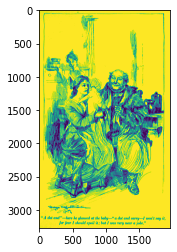

In [ ]:
# 2 number index a je value ase seita print korbe
url=images_boxable['OriginalURL'].values[2]
print(annotations_bbox.columns)
#print(images_boxable.columns)
print(url)
img=io.imread(url)
plt.imshow(img)

image_id=images_boxable.loc[images_boxable['OriginalURL']==url]['ImageID'].values[0]
print('images_boxable ImageID : ',image_id)
bbox_image_id=annotations_bbox.loc[annotations_bbox['ImageID']==image_id]
print(bbox_image_id)
	


In [ ]:
import pandas as pd 
# Creating a data frame 
df = pd.DataFrame([['Animal', 'Baby', 'Cat', 'Dog', 
					'Elephant', 'Frog', 'Gragor']]) 
# Itering over the data frame rows 
# using df.iterrows() 
itr = next(df.iterrows())[1] 
itr 

0      Animal
1        Baby
2         Cat
3         Dog
4    Elephant
5        Frog
6      Gragor
Name: 0, dtype: object

In [ ]:
# Code for plotting bounding box
def plot_bbox(img_id):
  #...['OriginalURL'].values[0] #: images_boxable er OriginalURL column er o index a je value thakbe ta bojatse
  img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0]
  #http://man.hubwiz.com/docset/Scikit-image.docset/Contents/Resources/Documents/api/skimage.io.html
  #	Load an image from file.
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = annotations_bbox.loc[annotations_bbox['ImageID']==img_id]
  print(bboxs)
  for index, row in bboxs.iterrows():
      xmin = row['XMin']
      xmax = row['XMax']
      ymin = row['YMin']
      ymax = row['YMax']
      xmin = int(xmin*width)
      xmax = int(xmax*width)
      ymin = int(ymin*height)
      ymax = int(ymax*height)
      label_name = row['LabelName']
      print('label name : ',label_name)
      class_series = class_descriptions.loc[class_descriptions[0]==label_name]
      print('class_series : ',class_series)
      #class_descriptions er 1 number column er value jeta hote just tar right side er value ta
      class_name = class_series[1].values[0]
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      #https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/
      #(xmin,ymin) represents top left corner of the rectangle
      #(xmax,ymax) represents bottom right corner of the rectangle
      #color (255,0,0):border line of rectangle to be drawn. For BGR, we pass a tuple,(255, 0, 0) for blue color.
      #thickness (5): It is the thickness of the rectangle border line in px.
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      #font: It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc.
      font = cv2.FONT_HERSHEY_SIMPLEX
      #https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [ ]:
annotations_bbox["ImageID"].value_counts()

55558de0ee48ecf6    745
51eac5c6e03db094    697
7d501a419bcd4908    621
fe5029b0fa7a6073    620
6d9e9b98df51edca    553
                   ... 
37a4fb32feefaf2c      1
0033313e433c511a      1
7afba04168655dbd      1
bf3c3cb1a4f87910      1
d188c32f2cc85246      1
Name: ImageID, Length: 1743042, dtype: int64

In [ ]:
annotations_bbox["ImageID"].value_counts().tail(5).index

Index(['37a4fb32feefaf2c', '0033313e433c511a', '7afba04168655dbd',
       'bf3c3cb1a4f87910', 'd188c32f2cc85246'],
      dtype='object')

In [ ]:
annotations_bbox["ImageID"].value_counts().tail(5).index.values

array(['37a4fb32feefaf2c', '0033313e433c511a', '7afba04168655dbd',
       'bf3c3cb1a4f87910', 'd188c32f2cc85246'], dtype=object)

745b084e89424cf3
Image: (1600, 1200, 3)
                  ImageID     Source  ... IsDepiction  IsInside
6888501  745b084e89424cf3  activemil  ...           0         0

[1 rows x 13 columns]
label name :  /m/04yx4
class_series :              0    1
307  /m/04yx4  Man
Coordinates: (39, 440), (416, 1550)


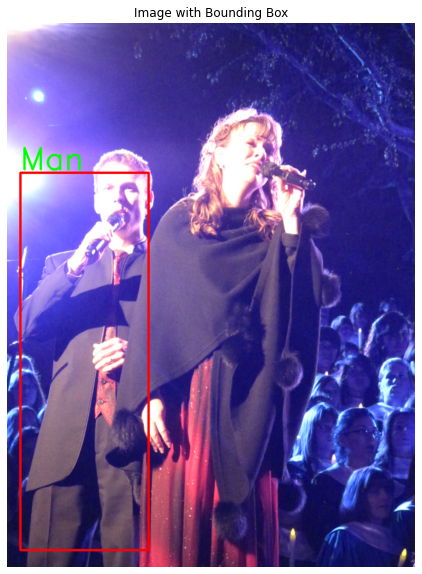

In [ ]:
least_objects_img_ids = annotations_bbox["ImageID"].value_counts().tail(50).index.values
#https://www.geeksforgeeks.org/python-random-sample-function/
#https://www.w3schools.com/python/ref_random_sample.asp
for img_id in random.sample(list(least_objects_img_ids), 1):
  print(img_id)
  plot_bbox(img_id)

In [ ]:
class_descriptions[1].count()

601

In [ ]:
# find the label_name for 'Bed', 'Chair' and 'Table' class
# we just use 3 classes out of 601 classes
bed_pd = class_descriptions[class_descriptions[1]=='Bed'] 
chair_pd=class_descriptions[class_descriptions[1]=='Chair']
table_pd=class_descriptions[class_descriptions[1]=='Table']
table_pd

,0,1
280,/m/04bcr3,Table


In [ ]:
####### Separating the label_name ############

label_name_bed=bed_pd[0].values[0]
label_name_chair=chair_pd[0].values[0]
label_name_table=table_pd[0].values[0]
label_name_table

'/m/04bcr3'

In [ ]:
# storing the bounding box cordinates on the basis of those separating 3 class (bed,char,table)

bed_bbox=annotations_bbox[annotations_bbox['LabelName']==label_name_bed]
chair_bbox=annotations_bbox[annotations_bbox['LabelName']==label_name_chair]
table_bbox=annotations_bbox[annotations_bbox['LabelName']==label_name_table]
table_bbox

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
8,000002b66c9c498e,xclick,/m/04bcr3,1,0.064062,0.492188,0.889063,0.993750,0,0,0,0,0
9,000002b66c9c498e,xclick,/m/04bcr3,1,0.301562,0.990625,0.462500,0.595312,0,0,0,0,0
10,000002b66c9c498e,xclick,/m/04bcr3,1,0.312500,0.578125,0.351562,0.464063,0,0,0,0,0
99,000020780ccee28d,xclick,/m/04bcr3,1,0.000000,0.850709,0.608125,0.999375,0,0,0,0,0
616,000060e3121c7305,xclick,/m/04bcr3,1,0.228750,0.696875,0.465792,0.926898,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14608492,fff5f96bcc3e7b0a,xclick,/m/04bcr3,1,0.933125,0.999375,0.298493,0.373823,1,1,0,0,0
14608836,fff7e938e70f95f4,xclick,/m/04bcr3,1,0.067500,0.160000,0.217778,0.300000,1,0,0,0,0
14608837,fff7e938e70f95f4,xclick,/m/04bcr3,1,0.072500,0.344375,0.267778,0.786667,1,0,0,0,0
14609260,fff9d0c14a4e5b06,xclick,/m/04bcr3,1,0.514563,0.588997,0.698571,0.772857,1,0,0,0,0


In [ ]:
# How many bed,chair and table 

print('there are %d beds in the dataset' %len(bed_bbox))
print('there are %d chairs in the dataset' %len(chair_bbox))
print('there are %d tables in the dataset' %len(table_bbox))

there are 3563 beds in the dataset
there are 132483 chairs in the dataset
there are 85691 tables in the dataset


In [ ]:
#Separating the ImageID corresponding to bed,chair and table

bed_image_id=bed_bbox['ImageID']
chair_image_id=chair_bbox['ImageID']
table_image_id=table_bbox['ImageID']

In [ ]:
#working on 100 images
n=100
subbed_image_id=random.sample(list(bed_image_id),n)
subchair_image_id=random.sample(list(chair_image_id),n)
subtable_image_id=random.sample(list(table_image_id),n)
subtable_image_id

['b58fbf35f2b0b74b',
 'aa1d895833b4edc5',
 '8efca87d883655c7',
 '5bbfb9fd11b812c3',
 'a2f476dbc1b12a41',
 'bd88030ff33a5c24',
 'b5b5aab72836b79d',
 '90f26d44b1d054c7',
 '53b0927c8a3fe4a4',
 '5b51430907a5085a']

In [ ]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
#Pandas isin() method is used to filter data frames. isin() method helps in selecting rows 
#with having a particular(or Multiple) value in a particular column.

#All information on the basis of subbed_image_id,subtable_image_id,subtable_image_id from images_boxable dataset
subbed_pd=images_boxable.loc[images_boxable['ImageID'].isin(subbed_image_id)]
subchair_pd=images_boxable.loc[images_boxable['ImageID'].isin(subbed_image_id)]
subtable_pd=images_boxable.loc[images_boxable['ImageID'].isin(subtable_image_id)]
subtable_pd

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
39034,8efca87d883655c7,train,https://farm8.staticflickr.com/8583/1621760645...,https://www.flickr.com/photos/fairfaxchamber/1...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/fairfaxchamber/,Northern Virginia Chamber of Commerce (Fairfax...,Government Contracting Council Meeting,2086781,3lhrtU85E2XFp1P+x6HifQ==,https://c8.staticflickr.com/9/8583/16217606457...,0.0
176356,a2f476dbc1b12a41,train,https://farm2.staticflickr.com/6091/6315590593...,https://www.flickr.com/photos/herry/6315590593/,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/herry/,Herry Lawford,Peter & Maggie's Wedding,2129797,nU9TjwXS6F56OMxbdiJcFw==,https://c7.staticflickr.com/7/6091/6315590593_...,0.0
680377,b5b5aab72836b79d,train,https://c6.staticflickr.com/8/7418/14013203188...,https://www.flickr.com/photos/governosp/140132...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/governosp/,Governo do Estado de São Paulo,Governador Geraldo Alckmin inaugura Fatec em ...,969794,G8U1phrDBlK6FQkGxyfDxQ==,https://c6.staticflickr.com/8/7418/14013203188...,0.0
729476,bd88030ff33a5c24,train,https://farm5.staticflickr.com/3114/2818537524...,https://www.flickr.com/photos/kjarrett/2818537524,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/kjarrett/,Kevin Jarrett,P9090118,169946,yo8zxQdQ9d140cGdNa1s4A==,https://c6.staticflickr.com/4/3114/2818537524_...,0.0
784061,5bbfb9fd11b812c3,train,https://farm4.staticflickr.com/8210/8237447106...,https://www.flickr.com/photos/belindah/8237447106,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/belindah/,belindah-Thank You!-450.000 Views Now,Shannon @ The Fair,1269987,TbiGdCEHMxY+SjY4UtcK4Q==,https://c2.staticflickr.com/9/8210/8237447106_...,0.0
822354,53b0927c8a3fe4a4,train,https://farm5.staticflickr.com/8124/8623353825...,https://www.flickr.com/photos/mengwong/8623353825,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/mengwong/,Meng Weng Wong,dsc_6334,1627212,dBoM8xGWZytpEBy5G7JQvQ==,https://c3.staticflickr.com/9/8124/8623353825_...,0.0
1070639,aa1d895833b4edc5,train,https://farm6.staticflickr.com/8166/7637380700...,https://www.flickr.com/photos/shankaronline/76...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/shankaronline/,shankar s.,Chokhi Dhani: amusement arcade,1511443,6KO1DLivn9bNbEpgZwkD/w==,https://c7.staticflickr.com/9/8166/7637380700_...,0.0
1196402,b58fbf35f2b0b74b,train,https://c4.staticflickr.com/1/378/18501409163_...,https://www.flickr.com/photos/larrison/1850140...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/larrison/,Jim Larrison,Hanging at the Bar in Jamaica,1716612,cRDyPGx6UUABTgU5QAKpeQ==,https://c7.staticflickr.com/1/378/18501409163_...,NaN
1207457,90f26d44b1d054c7,train,https://farm8.staticflickr.com/4144/4984925163...,https://www.flickr.com/photos/dobenewton/49849...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/dobenewton/,dobe Newton,"Steph, Luke, Dobe, Jeff Persson, Tenielle, Pru...",5751489,gsCFZWU7P4V+2U6KWD5kzA==,https://c5.staticflickr.com/5/4144/4984925163_...,NaN
1358972,5b51430907a5085a,train,https://c3.staticflickr.com/4/3766/9292881166_...,https://www.flickr.com/photos/82484720@N07/929...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/82484720@N07/,srmpbi,After the PLE Conf 2013,3062115,xG5o6+EwA7BFJ3XdmKZkEQ==,https://c1.staticflickr.com/4/3766/9292881166_...,0.0


In [ ]:
print('subbed : ',subbed_pd.shape,' subchair : ',subchair_pd.shape,' subtable : ',subtable_pd.shape)

subbed :  (10, 12)  subchair :  (10, 12)  subtable :  (10, 12)


In [ ]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/

# here leftmost numbers are the index

subbed_dict=subbed_pd[['ImageID','OriginalURL']]
subbed_dict


,ImageID,OriginalURL
490699,e374717e2321f581,https://farm2.staticflickr.com/340/19495294706...
562546,397cebc76945ff81,https://farm2.staticflickr.com/8509/8473324672...
579074,bd42b0d9f3aa1467,https://farm8.staticflickr.com/3956/1576814663...
592085,5b43dcef93c9be77,https://farm8.staticflickr.com/7269/1316765036...
983884,b8abbb92c6ccd145,https://farm6.staticflickr.com/2456/4038773648...
993964,632f1928afc940b5,https://farm6.staticflickr.com/2587/4008928629...
1063318,0269443588cda728,https://c1.staticflickr.com/4/3071/2861977481_...
1167250,84f0f17d560ab683,https://farm4.staticflickr.com/3506/3302980911...
1207381,59e412966f58ec5a,https://c3.staticflickr.com/5/4075/4747982389_...
1250855,05c3ac11049b8c07,https://farm8.staticflickr.com/7183/6783370172...


In [ ]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/

#But here ImageID is the index
subbed_dict=subbed_pd[['ImageID','OriginalURL']].set_index('ImageID')
subbed_dict

,OriginalURL
ImageID,
e374717e2321f581,https://farm2.staticflickr.com/340/19495294706...
397cebc76945ff81,https://farm2.staticflickr.com/8509/8473324672...
bd42b0d9f3aa1467,https://farm8.staticflickr.com/3956/1576814663...
5b43dcef93c9be77,https://farm8.staticflickr.com/7269/1316765036...
b8abbb92c6ccd145,https://farm6.staticflickr.com/2456/4038773648...
632f1928afc940b5,https://farm6.staticflickr.com/2587/4008928629...
0269443588cda728,https://c1.staticflickr.com/4/3071/2861977481_...
84f0f17d560ab683,https://farm4.staticflickr.com/3506/3302980911...
59e412966f58ec5a,https://c3.staticflickr.com/5/4075/4747982389_...


In [ ]:
subbed_dict=subbed_pd[['ImageID','OriginalURL']].set_index('ImageID')['OriginalURL']
subbed_dict

ImageID
e374717e2321f581    https://farm2.staticflickr.com/340/19495294706...
397cebc76945ff81    https://farm2.staticflickr.com/8509/8473324672...
bd42b0d9f3aa1467    https://farm8.staticflickr.com/3956/1576814663...
5b43dcef93c9be77    https://farm8.staticflickr.com/7269/1316765036...
b8abbb92c6ccd145    https://farm6.staticflickr.com/2456/4038773648...
632f1928afc940b5    https://farm6.staticflickr.com/2587/4008928629...
0269443588cda728    https://c1.staticflickr.com/4/3071/2861977481_...
84f0f17d560ab683    https://farm4.staticflickr.com/3506/3302980911...
59e412966f58ec5a    https://c3.staticflickr.com/5/4075/4747982389_...
05c3ac11049b8c07    https://farm8.staticflickr.com/7183/6783370172...
Name: OriginalURL, dtype: object

In [ ]:
subbed_dict=subbed_pd[['ImageID','OriginalURL']].set_index('ImageID').to_dict()
subbed_dict

{'OriginalURL': {'0269443588cda728': 'https://c1.staticflickr.com/4/3071/2861977481_4006f1c760_o.jpg',
  '05c3ac11049b8c07': 'https://farm8.staticflickr.com/7183/6783370172_be58800727_o.jpg',
  '397cebc76945ff81': 'https://farm2.staticflickr.com/8509/8473324672_218f8971a2_o.jpg',
  '59e412966f58ec5a': 'https://c3.staticflickr.com/5/4075/4747982389_fa9b2e84bf_o.jpg',
  '5b43dcef93c9be77': 'https://farm8.staticflickr.com/7269/13167650364_d2384b5410_o.jpg',
  '632f1928afc940b5': 'https://farm6.staticflickr.com/2587/4008928629_f75aef9a3e_o.jpg',
  '84f0f17d560ab683': 'https://farm4.staticflickr.com/3506/3302980911_1d27f357fb_o.jpg',
  'b8abbb92c6ccd145': 'https://farm6.staticflickr.com/2456/4038773648_46aa6c4bce_o.jpg',
  'bd42b0d9f3aa1467': 'https://farm8.staticflickr.com/3956/15768146632_b049c1ddc2_o.jpg',
  'e374717e2321f581': 'https://farm2.staticflickr.com/340/19495294706_9279bc945d_o.jpg'}}

In [ ]:
# just for this 'OriginalURL':  will be disappeared
subbed_dict=subbed_pd[['ImageID','OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
subbed_dict

{'0269443588cda728': 'https://c1.staticflickr.com/4/3071/2861977481_4006f1c760_o.jpg',
 '05c3ac11049b8c07': 'https://farm8.staticflickr.com/7183/6783370172_be58800727_o.jpg',
 '397cebc76945ff81': 'https://farm2.staticflickr.com/8509/8473324672_218f8971a2_o.jpg',
 '59e412966f58ec5a': 'https://c3.staticflickr.com/5/4075/4747982389_fa9b2e84bf_o.jpg',
 '5b43dcef93c9be77': 'https://farm8.staticflickr.com/7269/13167650364_d2384b5410_o.jpg',
 '632f1928afc940b5': 'https://farm6.staticflickr.com/2587/4008928629_f75aef9a3e_o.jpg',
 '84f0f17d560ab683': 'https://farm4.staticflickr.com/3506/3302980911_1d27f357fb_o.jpg',
 'b8abbb92c6ccd145': 'https://farm6.staticflickr.com/2456/4038773648_46aa6c4bce_o.jpg',
 'bd42b0d9f3aa1467': 'https://farm8.staticflickr.com/3956/15768146632_b049c1ddc2_o.jpg',
 'e374717e2321f581': 'https://farm2.staticflickr.com/340/19495294706_9279bc945d_o.jpg'}

In [ ]:
subbed_dict=subbed_pd[['ImageID','OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
subchair_dict=subchair_pd[['ImageID','OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
subtable_dict=subtable_pd[['ImageID','OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
subbed_dict

{'0269443588cda728': 'https://c1.staticflickr.com/4/3071/2861977481_4006f1c760_o.jpg',
 '05c3ac11049b8c07': 'https://farm8.staticflickr.com/7183/6783370172_be58800727_o.jpg',
 '397cebc76945ff81': 'https://farm2.staticflickr.com/8509/8473324672_218f8971a2_o.jpg',
 '59e412966f58ec5a': 'https://c3.staticflickr.com/5/4075/4747982389_fa9b2e84bf_o.jpg',
 '5b43dcef93c9be77': 'https://farm8.staticflickr.com/7269/13167650364_d2384b5410_o.jpg',
 '632f1928afc940b5': 'https://farm6.staticflickr.com/2587/4008928629_f75aef9a3e_o.jpg',
 '84f0f17d560ab683': 'https://farm4.staticflickr.com/3506/3302980911_1d27f357fb_o.jpg',
 'b8abbb92c6ccd145': 'https://farm6.staticflickr.com/2456/4038773648_46aa6c4bce_o.jpg',
 'bd42b0d9f3aa1467': 'https://farm8.staticflickr.com/3956/15768146632_b049c1ddc2_o.jpg',
 'e374717e2321f581': 'https://farm2.staticflickr.com/340/19495294706_9279bc945d_o.jpg'}

In [ ]:
mappings=[subbed_dict,subchair_dict,subtable_dict]
#mappings

In [ ]:
len(mappings)

3

In [ ]:
len(mappings[1])

10

In [ ]:
classes=['Bed','Chair','Table']
classes

['Bed', 'Chair', 'Table']

In [ ]:
############# enumerate without loop##################
l1 = ["eat","sleep","repeat"]
s1 = "sohag"
### create enumerate,,,,,,,,, To print out we use list() method
print(list(enumerate(l1)))

#Start index from 0 to 2
print(list(enumerate(s1,2)))

[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(2, 's'), (3, 'o'), (4, 'h'), (5, 'a'), (6, 'g')]


In [ ]:
############# enumerate with loop##################
l1 = ["eat","sleep","repeat"]
#printing the tuples in object directly
for ele in enumerate(l1):
  print(ele)
print()

#changing index and printing separately
for count,ele in enumerate(l1,100):
  print(count,ele)

(0, 'eat')
(1, 'sleep')
(2, 'repeat')

100 eat
101 sleep
102 repeat


In [ ]:
thisdict =	{
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
for x, y in thisdict.items():
  print(x, y)


brand Ford
model Mustang
year 1964


In [ ]:
#download images in folder (Bed,Chair,Table wth 10 images each)

for idx,obj_type in enumerate(classes):
  n_issues=0
  #create the directory
  if not os.path.exists(obj_type):
    os.mkdir(obj_type)
  for img_id,url in mappings[idx].items():
    try:
      #print(img_id)
      img=io.imread(url)
      saved_path=os.path.join(obj_type, img_id+".jpg")
      io.imsave(saved_path, img)
    except Exception as e:
      n_issues+=1
      
  print(f"Images Issues : {n_issues}")

Images Issues : 1
Images Issues : 1
Images Issues : 3


In [ ]:
#https://www.w3schools.com/python/ref_string_startswith.asp

txt = "Hello, welcome to my world."
x = txt.startswith("wel", 7, 20)
print(x)
print('################################')
#https://www.geeksforgeeks.org/python-string-startswith/

# Python code shows the working of 
# .startsswith() function  
text = "geeks for geeks."
# returns False 
result = text.startswith('for geeks') 
print (result)   
# returns True 
result = text.startswith('geeks') 
print (result)   
# returns False 
result = text.startswith('for geeks.') 
print (result)   
# returns True 
result = text.startswith('geeks for geeks.') 
print (result)

True
################################
False
True
False
True


In [ ]:
all_imgs=os.listdir(classes[0])
print(all_imgs)
#jodi all_imgs er kno value . dara suru hoi tobe oi . dia suru howa value bad dia baki value store hobe
all_imgs = [f for f in all_imgs if not f.startswith('.')]
all_imgs

['05c3ac11049b8c07.jpg', '0269443588cda728.jpg', '397cebc76945ff81.jpg', '59e412966f58ec5a.jpg', 'bd42b0d9f3aa1467.jpg', '84f0f17d560ab683.jpg', 'b8abbb92c6ccd145.jpg', '632f1928afc940b5.jpg', '5b43dcef93c9be77.jpg']


['05c3ac11049b8c07.jpg',
 '0269443588cda728.jpg',
 '397cebc76945ff81.jpg',
 '59e412966f58ec5a.jpg',
 'bd42b0d9f3aa1467.jpg',
 '84f0f17d560ab683.jpg',
 'b8abbb92c6ccd145.jpg',
 '632f1928afc940b5.jpg',
 '5b43dcef93c9be77.jpg']

In [ ]:
#all_imgs='sfdsfdsdsvds.jpg'
#all_imgs.append('.ooooop')
#print(all_imgs)

# all_imgs = [f for f in all_imgs if not f.startswith('.')]
# all_imgs

In [ ]:
# Save images to train and test directory, so create 2 folders
train_path='train'
test_path='test' 
if not os.path.exists('train'):
  os.mkdir('train')
if not os.path.exists('test'):
  os.mkdir('test')

In [ ]:
# limit = int(n*0.8) # 80% data for training and 20% for testing
# train_imgs = all_imgs[:limit]
# test_imgs = all_imgs[limit:]

In [ ]:
# i=0
# for j in range(len(train_imgs)):
#     original_path = os.path.join(classes[i], train_imgs[j])
#     print(original_path)
#     new_path = os.path.join(train_path, train_imgs[j])
#     print(new_path)
#     copyfile(original_path, new_path)
#     print('copyfile : ',copyfile(original_path, new_path))

In [ ]:
n=100
for i in range(len(classes)):
  all_imgs=os.listdir(classes[i])
  all_imgs=[f for f in all_imgs if not f.startswith('.')]
  print('before shuffle : ',all_imgs)
  random.shuffle(all_imgs)
  print('after shuffle  : ',all_imgs)
  print(len(all_imgs))
  limit=int(n*.6)
  print(limit)
  train_imgs=all_imgs[:limit]
  print(train_imgs)
  test_imgs=all_imgs[limit:]
  print(test_imgs)
  for j in range(len(train_imgs)):
    original_path=os.path.join(classes[i],train_imgs[j])
    new_path=os.path.join('train',train_imgs[j])
    copyfile(original_path,new_path)

  for j in range(len(test_imgs)):
    original_path=os.path.join(classes[i],test_imgs[j])
    new_path=os.path.join('test',test_imgs[j])
    copyfile(original_path,new_path)



before shuffle :  ['05c3ac11049b8c07.jpg', '0269443588cda728.jpg', '397cebc76945ff81.jpg', '59e412966f58ec5a.jpg', 'bd42b0d9f3aa1467.jpg', '84f0f17d560ab683.jpg', 'b8abbb92c6ccd145.jpg', '632f1928afc940b5.jpg', '5b43dcef93c9be77.jpg']
after shuffle  :  ['84f0f17d560ab683.jpg', '632f1928afc940b5.jpg', '0269443588cda728.jpg', '5b43dcef93c9be77.jpg', 'bd42b0d9f3aa1467.jpg', '397cebc76945ff81.jpg', '59e412966f58ec5a.jpg', 'b8abbb92c6ccd145.jpg', '05c3ac11049b8c07.jpg']
9
6
['84f0f17d560ab683.jpg', '632f1928afc940b5.jpg', '0269443588cda728.jpg', '5b43dcef93c9be77.jpg', 'bd42b0d9f3aa1467.jpg', '397cebc76945ff81.jpg']
['59e412966f58ec5a.jpg', 'b8abbb92c6ccd145.jpg', '05c3ac11049b8c07.jpg']
before shuffle :  ['05c3ac11049b8c07.jpg', '0269443588cda728.jpg', '397cebc76945ff81.jpg', '59e412966f58ec5a.jpg', 'bd42b0d9f3aa1467.jpg', '84f0f17d560ab683.jpg', 'b8abbb92c6ccd145.jpg', '632f1928afc940b5.jpg', '5b43dcef93c9be77.jpg']
after shuffle  :  ['397cebc76945ff81.jpg', '05c3ac11049b8c07.jpg', '02694

In [ ]:
train_img_count=os.listdir('/content/train')
print('Number of images in train found: ',len(train_img_count))


test_img_count=os.listdir('/content/test')
print('Number of images in test found: ',len(test_img_count))

Number of images in train found:  15
Number of images in test found:  7


In [ ]:
label_names=[label_name_bed,label_name_chair,label_name_table]
print(label_names[0],'    ',label_name_bed)
train_df=pd.DataFrame(columns=['FileName','XMin','XMax','YMin','YMax','ClassName'])
print(train_df)
train_df
train_imgs=os.listdir('/content/train')
train_imgs=[f for f in train_imgs if not f.startswith('.')]
print(len(train_imgs))

/m/03ssj5      /m/03ssj5
Empty DataFrame
Columns: [FileName, XMin, XMax, YMin, YMax, ClassName]
Index: []
15


In [ ]:
###################### just test ########################
import sys 
import time 
for i in range(10): 
    print(i, end =' ') 
    sys.stdout.flush() 
    time.sleep(1) 

0 1 2 3 4 5 6 7 8 9 

In [ ]:
###################### just test ########################
print(train_imgs)
a=train_imgs[0]
print('a : ',a)
train_img_id=a[0:16]
print('train_img_id : ',train_img_id)
t_df=annotations_bbox.loc[annotations_bbox['ImageID']==train_img_id]
t_df.head()
for index,row in t_df.iterrows():
  #print(row)
  label_name=row['LabelName']
  #print(label_name)
  for i in range(len(label_names)):
    if(label_name==label_names[i]):
      print(label_names[i])


['05c3ac11049b8c07.jpg', '0269443588cda728.jpg', '397cebc76945ff81.jpg', '59e412966f58ec5a.jpg', '5bbfb9fd11b812c3.jpg', '53b0927c8a3fe4a4.jpg', '8efca87d883655c7.jpg', 'bd42b0d9f3aa1467.jpg', '84f0f17d560ab683.jpg', '5b51430907a5085a.jpg', 'a2f476dbc1b12a41.jpg', 'b8abbb92c6ccd145.jpg', '632f1928afc940b5.jpg', '5b43dcef93c9be77.jpg', '90f26d44b1d054c7.jpg']
a :  05c3ac11049b8c07.jpg
train_img_id :  05c3ac11049b8c07
/m/03ssj5
/m/03ssj5


In [ ]:
for i in range(len(train_imgs)):
  img_name=train_imgs[i]
  img_id=img_name[0:16]
  #print(img_name,'     ',img_id)
  tmp_df=annotations_bbox[annotations_bbox['ImageID']==img_id]
  for index,row in tmp_df.iterrows():
    labelName=row['LabelName']
    for j in range(len(label_names)):
      if(labelName==label_names[j]):
       # print(labelName)
        train_df=train_df.append({
            'FileName':img_name,
            'XMin':row['XMin'],
            'XMax':row['XMax'],
            'YMin':row['YMin'],
            'YMax':row['YMax'],
            'ClassName':classes[j]
        },ignore_index=True)

In [ ]:
print(train_df.shape)
train_df.head()

(32, 6)


,FileName,XMin,XMax,YMin,YMax,ClassName
0,05c3ac11049b8c07.jpg,0.193125,0.485000,0.393333,0.780833,Bed
1,05c3ac11049b8c07.jpg,0.456875,0.779375,0.393333,0.797500,Bed
2,0269443588cda728.jpg,0.000000,0.157895,0.567976,0.805136,Table
3,0269443588cda728.jpg,0.105263,0.997895,0.484894,0.998489,Bed
4,0269443588cda728.jpg,0.587368,0.755789,0.527190,0.608761,Table


In [ ]:
############################## ager ta(plot_bbox) sudu print gulo bad dia #########################
# Code for plotting bounding box
def plot_bbox(img_id):
  #...['OriginalURL'].values[0] #: images_boxable er OriginalURL column er o index a je value thakbe ta bojatse
  img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0]
  #http://man.hubwiz.com/docset/Scikit-image.docset/Contents/Resources/Documents/api/skimage.io.html
  #	Load an image from file.
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = annotations_bbox.loc[annotations_bbox['ImageID']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['XMin']
      xmax = row['XMax']
      ymin = row['YMin']
      ymax = row['YMax']
      xmin = int(xmin*width)
      xmax = int(xmax*width)
      ymin = int(ymin*height)
      ymax = int(ymax*height)
      label_name = row['LabelName']
      class_series = class_descriptions.loc[class_descriptions[0]==label_name]
      #class_descriptions er 1 number column er value jeta hote just tar right side er value ta
      class_name = class_series[1].values[0]
      #print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      #https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/
      #(xmin,ymin) represents top left corner of the rectangle
      #(xmax,ymax) represents bottom right corner of the rectangle
      #color (255,0,0):border line of rectangle to be drawn. For BGR, we pass a tuple,(255, 0, 0) for blue color.
      #thickness (5): It is the thickness of the rectangle border line in px.
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      #font: It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc.
      font = cv2.FONT_HERSHEY_SIMPLEX
      #https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [ ]:
#https://www.geeksforgeeks.org/python-string-split/
text = 'geeks for geeks'
# Splits at space 
print(text.split()) 
word = 'geeks, for, geeks'
# Splits at ',' 
print(word.split(',')) 
word = 'geeks:for:geeks'
# Splitting at ':' 
print(word.split(':')) 
word = 'CatBatSatFatOr'
# Splitting at 3 
########### here 2 is increment number
print([word[i:i+2] for i in range(0, len(word),2)]) 


['geeks', 'for', 'geeks']
['geeks', ' for', ' geeks']
['geeks', 'for', 'geeks']
['Ca', 'tB', 'at', 'Sa', 'tF', 'at', 'Or']


In [ ]:
train_img_ids=train_df['FileName'].head().str
train_img_ids

In [ ]:
#str a convert kore nite hobe, ta na hole(below) error pabo
########## AttributeError: 'Series' object has no attribute 'split'###############
train_img_ids=train_df['FileName'].head().str.split('.')
train_img_ids

0    [05c3ac11049b8c07, jpg]
1    [05c3ac11049b8c07, jpg]
2    [0269443588cda728, jpg]
3    [0269443588cda728, jpg]
4    [0269443588cda728, jpg]
Name: FileName, dtype: object

In [ ]:
train_img_ids=train_df['FileName'].head().str.split('.').str[0]
print(train_img_ids)
train_img_ids=train_df['FileName'].head().str.split('.').str[1]
print(train_img_ids)

0    05c3ac11049b8c07
1    05c3ac11049b8c07
2    0269443588cda728
3    0269443588cda728
4    0269443588cda728
Name: FileName, dtype: object
0    jpg
1    jpg
2    jpg
3    jpg
4    jpg
Name: FileName, dtype: object


In [ ]:
train_img_ids=train_df['FileName'].head().str.split('.').str[0].unique()
print(train_img_ids)
train_img_ids=train_df['FileName'].head().str.split('.').str[1].unique()
print(train_img_ids)

['05c3ac11049b8c07' '0269443588cda728']
['jpg']


Image: (1944, 2592, 3)


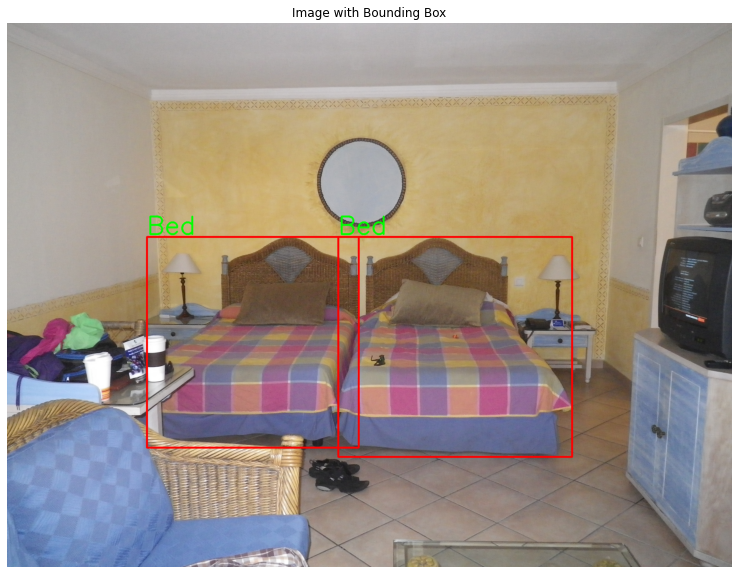

Image: (662, 475, 3)


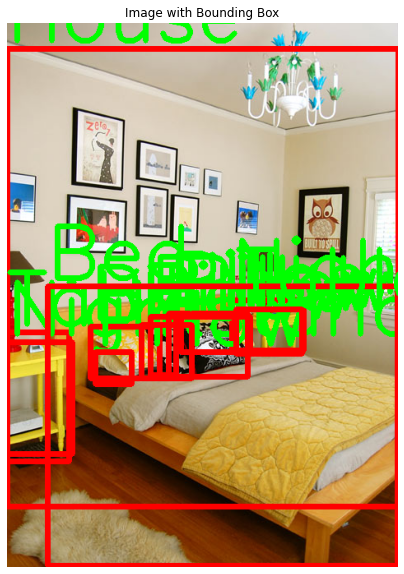

In [ ]:
train_img_ids = train_df["FileName"].head().str.split(".").str[0].unique() # plotting the bounding box
for i in train_img_ids:
  plot_bbox(i)

In [ ]:
label_names=[label_name_bed,label_name_chair,label_name_table]
print(label_names[0],'     ',label_name_bed)
test_df=pd.DataFrame(columns=['FileName','XMin','XMax','YMin','YMax','ClassName'])
test_df
test_imgs=os.listdir('/content/test')
test_imgs
test_imgs=[f for f in test_imgs if not f.startswith('.')]
test_imgs

/m/03ssj5       /m/03ssj5


['aa1d895833b4edc5.jpg',
 '05c3ac11049b8c07.jpg',
 '59e412966f58ec5a.jpg',
 'bd42b0d9f3aa1467.jpg',
 '84f0f17d560ab683.jpg',
 'b8abbb92c6ccd145.jpg',
 '632f1928afc940b5.jpg']

In [ ]:
for i in range(len(test_imgs)):
  img_name=test_imgs[i]
  img_id=img_name[0:16]
  #print(img_name,'    ',img_id)
  tmp_df=annotations_bbox[annotations_bbox['ImageID']==img_id]
  for index,row in tmp_df.iterrows():
    labelName=row['LabelName']
    #print(labelName)
    for j in range(len(label_names)):
      if(label_names[j]==labelName):
        #print(labelName)
        test_df=test_df.append({
            'FileName':img_name,
            'XMin':row['XMin'],
            'XMax':row['XMin'],
            'YMin':row['YMin'],
            'YMax':row['YMax'],
            'ClassName':classes[j]
        },ignore_index=True)



In [ ]:
print(test_df.shape)
test_df

(16, 6)


,FileName,XMin,XMax,YMin,YMax,ClassName
0,aa1d895833b4edc5.jpg,0.256875,0.256875,0.578889,0.662222,Table
1,aa1d895833b4edc5.jpg,0.289375,0.289375,0.592222,0.701111,Table
2,aa1d895833b4edc5.jpg,0.325000,0.325000,0.570000,0.848889,Table
3,aa1d895833b4edc5.jpg,0.956875,0.956875,0.728889,0.778889,Table
4,05c3ac11049b8c07.jpg,0.193125,0.193125,0.393333,0.780833,Bed
5,05c3ac11049b8c07.jpg,0.456875,0.456875,0.393333,0.797500,Bed
6,59e412966f58ec5a.jpg,0.112500,0.112500,0.607379,0.710501,Bed
7,59e412966f58ec5a.jpg,0.268750,0.268750,0.231788,0.840114,Bed
8,59e412966f58ec5a.jpg,0.323750,0.323750,0.573321,0.681173,Bed
9,59e412966f58ec5a.jpg,0.323750,0.323750,0.684957,0.797540,Bed


In [ ]:
test_df['FileName'].shape

(16,)

In [ ]:
################# convert into csv #########################

########## train_csv er index show korbe na
train_df.to_csv('train_csv',index=False)
test_df.to_csv('test_csv')
train_csv=pd.read_csv('train_csv')
print('train_csv : ',train_csv.shape)
test_csv=pd.read_csv('test_csv')
print('test_csv  : ',test_csv.shape)

train_csv :  (32, 6)
test_csv  :  (16, 7)


In [ ]:
ab=train_csv['FileName'][0]
a=cv2.imread(ab)
#### .csv te convert korle FileName er kisu return korbe na
print(a)

None


In [ ]:
#https://www.tutorialspoint.com/python/python_files_io.htm
#https://www.guru99.com/reading-and-writing-files-in-python.html
#https://www.w3schools.com/python/python_file_open.asp
# Open a file
fo = open("python_file_handling.txt", "wb")
print("Name of the file: ", fo.name)
print("Closed or not : ", fo.closed)
print("Opening mode : ", fo.mode)

print('#########################################')

# Open a file
with open("python_file_handling.txt", "w+") as f:
  print("Name of the file: ", f.name)
  f.write('this is python file handling')
# Close opend file
fo.close()

Name of the file:  python_file_handling.txt
Closed or not :  False
Opening mode :  wb
#########################################
Name of the file:  python_file_handling.txt


In [ ]:

c=0
for idx,row in train_df.iterrows():
  c+=1
  if(c>5):
    break
  print('train/' + row['FileName'])
  img=cv2.imread('train/'+row['FileName'])
  height,width=img.shape[:2]
  print(height,'   ',width)
  #print(img)


train/05c3ac11049b8c07.jpg
1944     2592
train/05c3ac11049b8c07.jpg
1944     2592
train/0269443588cda728.jpg
662     475
train/0269443588cda728.jpg
662     475
train/0269443588cda728.jpg
662     475


In [ ]:
#train_df
d={}
with open('train_annotation.txt','w+') as f:
  for index,row in train_df.iterrows():
    img=cv2.imread('train/'+row['FileName'])
    #print(img)
    height,width=img.shape[:2]
    x1=int(row['XMin']*width)
    x2=int(row['XMax']*width)
    y1=int(row['YMin']*height)
    y2=int(row['YMax']*height)
    train='/content/train'
    fileName=os.path.join(train,row['FileName'])
    className=row['ClassName']
    #print(className)
    f.write(fileName + ',' + str(x1) + ',' + str(x2) + ',' + str(y1) + ',' + str(y2) + ',' + className + '\n')
    


In [ ]:
img.shape

(2712, 3616, 3)

In [ ]:
with open('test_annotations.txt','w+') as f:
  for index,row in test_df.iterrows():
    img=cv2.imread('test/'+row['FileName'])
    height,width=img.shape[:2]
    height,width=img.shape[:2]
    x1=int(row['XMin']*width)
    x2=int(row['XMax']*width)
    y1=int(row['YMin']*height)
    y2=int(row['YMax']*height)
    test='/content/test'
    fileName=os.path.join(test,row['FileName'])
    className=row['ClassName']
    f.write(fileName+','+str(x1)+','+str(x2)+','+str(y1)+','+str(y2)+','+className+'\n')
    


In [ ]:
filename = '/Faster_RCNN/MyDrive/faster_RCNN/dataset_pickle'
outfile = open(filename,'wb')

In [ ]:
dogs_dict = { 'Ozzy': 3, 'Filou': 8, 'Luna': 5, 'Skippy': 10, 'Barco': 12, 'Balou': 9, 'Laika': 16 }

In [ ]:
import pickle
pickle.dump('/content/train_annotation.txt',outfile)
outfile.close()

In [ ]:
infile = open(filename,'rb')
new_dict = pickle.load(infile)
infile.close()

In [ ]:
print(new_dict)
#print(new_dict==dogs_dict)
print(type(new_dict))

/content/train_annotation.txt
<class 'str'>


In [ ]:
f=open('/content/train_annotation.txt',"r+")
lines=f.readlines()
result=[]
for x in lines:
    result.append(x.split(',')[0])
print(type(result[0]))
f.close()

<class 'str'>


In [ ]:
a=cv2.imread(result[0])
print(a.shape)

(1944, 2592, 3)


In [ ]:
ab='/content/train/1b57955d52914789.jpg'
ab

'/content/train/1b57955d52914789.jpg'

In [ ]:
a=cv2.imread(ab)
#print(a)